In [1]:
import numpy as np
from numpy.linalg import eig
import scipy.sparse.linalg

data = open('pageRank-gr0.California.txt', 'r')

a = True
edge_list = np.empty((16150, 2), dtype=int)
i = 0
M=np.zeros((9664,9664), dtype=float) 

while a:
    data_line = data.readline()
    if not data_line:
        print("eof")
        a = False
        break
    if data_line[0] == 'e':
        t = data_line.split()
        edge_list[i][0] = t[1]
        edge_list[i][1] = t[2]
        i = i + 1


# Creating link matrix, binary
for i in range(len(edge_list)):
    M[edge_list[i][1]][edge_list[i][0]] = 1

column_sum = M.sum(axis=1)

# Create d
d = np.zeros(len(column_sum))
for x in range(len(column_sum)):
 if(column_sum[x] == 0):
     d[x] = 1

# To prevent division with 0
for x in range(len(column_sum)):
    if column_sum[x] == 0:
        column_sum[x] = 1

for i in range(len(column_sum)):
    M[:][i] = M[:][i] / column_sum[i]
    print(np.sum(M[:][i]))



eof
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
0.9999999999999998
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999998
1.0
0.0
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999998
0.9

In [2]:
e = np.ones(len(column_sum))
ed = np.outer(e,d)

P = M + 1/len(column_sum) * ed

alpha = 0.85
eeT = np.outer(e,e)
A = alpha * P + (1 - alpha) * 1/len(column_sum) * eeT

eigs_A = scipy.sparse.linalg.eigs(A, k=1, which='LM')
print(np.abs(eigs_A))
print(np.shape(eigs_A))
print(eigs_A[1])

[array([0.87124262]) array([[0.0119046 ],
                            [0.01066861],
                            [0.02446747],
                            ...,
                            [0.00523062],
                            [0.00523062],
                            [0.00523062]])]
(2,)
[[-0.0119046 +0.j]
 [-0.01066861+0.j]
 [-0.02446747+0.j]
 ...
 [-0.00523062+0.j]
 [-0.00523062+0.j]
 [-0.00523062+0.j]]


C:\Users\Ruben\AppData\Local\Temp/ipykernel_20836/1796575359.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.abs(eigs_A))
C:\Users\Ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


[1. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]
[2.46294416e-05 1.00181065e-05 1.34554630e-05 ... 6.31254889e-05
 6.31254889e-05 6.71791044e-05] [1.53833785e-05 8.19849638e-06 4.49038319e-06 ... 3.88016859e-06
 3.88016859e-06 3.88016859e-06]


<Figure size 432x288 with 0 Axes>

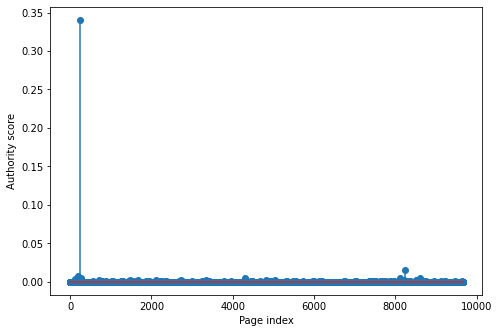

<Figure size 432x288 with 0 Axes>

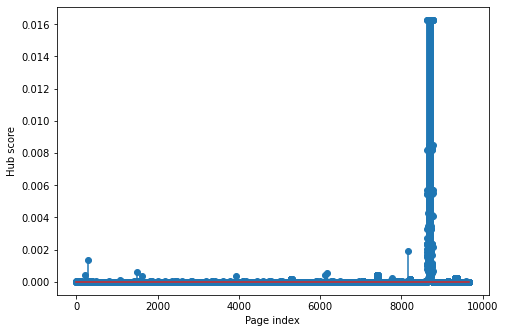

In [4]:
Au = A.transpose().dot(A) 
Hu = A.dot(A.transpose()) 
a=np.ones(A.shape[0])
h=np.ones(A.shape[0])
print(a,h)
for j in range(5):
    a = a.dot(Au)
    a = a/sum(a)
    h = h.dot(Hu)
    h = h/sum(h)

print(a,h)

import matplotlib.pyplot as plt

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel('Authority score')
ax.set_xlabel('Page index')
ax.stem(a)
plt.show()

plt.clf()
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.set_ylabel('Hub score')
ax2.set_xlabel('Page index')
ax2.stem(h)
plt.show()